# Project Title: UPI Fraud Detection using Machine Learning

## Introduction

Welcome to the project on UPI fraud detection using machine learning! In this project, we aim to develop machine learning models to detect fraudulent transactions in UPI (Unified Payments Interface) data.

## Project Information

### Developer Names:
    Arushi Ali 
    Anjali verma
    
### Date of Completion:
- 12th May 2024

### Data Source:
The dataset used in this project is a synthetically created dataset containing 50,000 rows of UPI transaction data. It has been modified to include variability and patterns for fraud detection purposes.

## About the Dataset
The dataset contains transaction data related to UPI (Unified Payments Interface) transactions. It includes various features related to transactions and fraud indicators. It includes the data for fraudulent transactions for financial year 2023 to 2024.

### Features:
- Transaction_ID: Unique identifier for each transaction.
- Date: Date of the transaction.
- Time: Time of the transaction.
- Merchant_ID: Unique identifier for the merchant involved in the transaction.
- Customer_ID: Unique identifier for the customer involved in the transaction.
- Device_ID: Unique identifier for the device used for the transaction.
- Transaction_Type: Type of transaction (e.g., payment, transfer, etc.).
- Payment_Gateway: Payment gateway used for the transaction.
- Transaction_City: City where the transaction took place.
- Transaction_State: State where the transaction took place.
- IP_Address: IP address associated with the transaction.
- Transaction_Status: Status of the transaction (e.g., success, failure, etc.).
- Device_OS: Operating system of the device used for the transaction.
- Transaction_Frequency: Frequency of transactions for the customer.
- Merchant_Category: Category of the merchant involved in the transaction.
- Transaction_Channel: Channel used for the transaction (e.g., mobile app, website, etc.).
- Transaction_Amount_Deviation: Deviation of the transaction amount from the average transaction amount.
- Days_Since_Last_Transaction: Number of days since the last transaction.
- Amount: Transaction amount.
- Fraud: Indicates whether the transaction is fraudulent (1) or not (0).

## Methodology
1. Data Preprocessing: Cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.
2. Exploratory Data Analysis: Understanding the distribution of features and identifying patterns related to fraud.
3. Feature Engineering: Creating new features or transforming existing ones to improve model performance.
4. Model Development: Training machine learning models for fraud detection.
5. Model Evaluation: Assessing model performance using metrics such as accuracy, precision, recall, and F1-score.
6. Conclusion: Summarizing findings and discussing potential areas for improvement.

Let's dive into the project and start exploring the data!

In [75]:
# Importing Libaries

# import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
# Load dataset
df = pd.read_csv("/Users/AVI K PLAYS YT/Desktop/major project/UPI_Dataset.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                5000 non-null   object 
 1   Date                          5000 non-null   object 
 2   Time                          5000 non-null   object 
 3   Merchant_ID                   5000 non-null   object 
 4   Customer_ID                   5000 non-null   object 
 5   Device_ID                     5000 non-null   object 
 6   Transaction_Type              5000 non-null   object 
 7   Payment_Gateway               5000 non-null   object 
 8   Transaction_City              5000 non-null   object 
 9   Transaction_State             5000 non-null   object 
 10  IP_Address                    5000 non-null   object 
 11  Transaction_Status            5000 non-null   object 
 12  Device_OS                     5000 non-null   object 
 13  Tra

In [11]:
df.shape

(5000, 20)

In [12]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T10000000,08/10/23,09:56:14,56ebe5e0-995d-4005-83c6-07b6e91c790b,1084d8aa-0091-4484-a140-0a9a453e6f37,7dc2a0de-9c95-4987-8bbe-28d513dae7fd,Purchase,Bank of Data,Moradabad,Punjab,50.165.110.31,Pending,Android,0,Travel bookings,Mobile,94.536644,23,788.262633,1
1,T10000001,16/05/23,05:07:01,1706df96-bf79-4c3c-9f64-e9dbee5515fb,6a5c51d5-0c44-4f9f-b794-f820b9063286,87800a83-bae9-428b-9ad5-b40c37812a49,Purchase,Sigma Bank,Shahjahanpur,Assam,136.126.138.5,Completed,MacOS,0,Financial services and Taxes,Online,39.923822,24,83.439152,0
2,T10000002,12/09/23,04:59:46,8dc8b698-71b6-40ab-8df3-db663b930e78,cab87f25-dc80-422d-8ea3-15eed562c68f,a753e488-4b80-4bde-b658-2519dbc91cec,Bill Payment,Sigma Bank,Giridih,Sikkim,205.160.206.92,Pending,Android,0,Utilities,Mobile,33.235850,25,83.891559,0
3,T10000003,06/04/24,02:41:27,78f6a3ce-b95c-4a84-98bd-7733e0bb865c,d5ab7e7d-2b69-4e90-82ba-036b1fc40938,bd45d094-1609-47c8-bc06-96fb84845b88,Subscription,SamplePay,Vijayawada,Odisha,152.145.0.137,Failed,iOS,3,More Services,In-store,-30.788993,15,136.972562,1
4,T10000004,16/09/23,06:34:53,c40e375a-8843-4e6f-89ab-193db288d017,85b6385e-210e-464e-a29f-26956df31bb0,98530f05-e28d-46f2-9b11-36f8bfeca306,Purchase,Gamma Bank,Faridabad,Mizoram,15.112.16.85,Completed,Windows,6,Investment,Mobile,-49.113426,5,4.654857,0


### DATA PREPARATION

In [13]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
# Check missing values
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [15]:
# Check unique values
df.nunique()

Transaction_ID                  5000
Date                             302
Time                            4753
Merchant_ID                      647
Customer_ID                      647
Device_ID                        647
Transaction_Type                   7
Payment_Gateway                    9
Transaction_City                 281
Transaction_State                 28
IP_Address                       647
Transaction_Status                 3
Device_OS                          4
Transaction_Frequency             32
Merchant_Category                 10
Transaction_Channel                3
Transaction_Amount_Deviation    5000
Days_Since_Last_Transaction       34
amount                          5000
fraud                              2
dtype: int64

In [16]:
# Find unique columns with unique values
unique_columns = df.columns[df.nunique() == len(df)]
print("Unique columns with unique values:")
print(unique_columns)

Unique columns with unique values:
Index(['Transaction_ID', 'Transaction_Amount_Deviation', 'amount'], dtype='object')


In [17]:
# Droping ID columns as they do not add any value to the analysis
df.drop(columns=['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID','IP_Address'], axis=1, inplace=True)

### Data Cleaning and Feature Engineering

In [18]:
# Date column
df['Date'].head()

0    08/10/23
1    16/05/23
2    12/09/23
3    06/04/24
4    16/09/23
Name: Date, dtype: object

In [19]:
# Converting Date column to datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

In [20]:
# Extracting year from date
df['Year'] = df['Date'].dt.year

In [21]:
# Extracting month from date
df['Month']= df['Date'].dt.month

# Now month needs to be in MMM format

In [22]:
# Checking columns
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [23]:
# First 5 rows
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-10-08,09:56:14,Purchase,Bank of Data,Moradabad,Punjab,Pending,Android,0,Travel bookings,Mobile,94.536644,23,788.262633,1,2023,10
1,2023-05-16,05:07:01,Purchase,Sigma Bank,Shahjahanpur,Assam,Completed,MacOS,0,Financial services and Taxes,Online,39.923822,24,83.439152,0,2023,5
2,2023-09-12,04:59:46,Bill Payment,Sigma Bank,Giridih,Sikkim,Pending,Android,0,Utilities,Mobile,33.235850,25,83.891559,0,2023,9
3,2024-04-06,02:41:27,Subscription,SamplePay,Vijayawada,Odisha,Failed,iOS,3,More Services,In-store,-30.788993,15,136.972562,1,2024,4
4,2023-09-16,06:34:53,Purchase,Gamma Bank,Faridabad,Mizoram,Completed,Windows,6,Investment,Mobile,-49.113426,5,4.654857,0,2023,9


In [24]:
# Checking the unique values in the month column
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [25]:
# Assigning Names to the months for better readability

months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [26]:
# Map the 'Month' column values to their corresponding month names
df['Month'] = df['Month'].map(months)


In [27]:
# Descriptive statistics for numerical variables
numerical_stats = df.describe().T
print("Descriptive statistics for numerical variables:")
numerical_stats

Descriptive statistics for numerical variables:


,count,mean,min,25%,50%,75%,max,std
Date,5000,2023-10-14 09:08:55.680000,2023-04-14 00:00:00,2023-07-22 00:00:00,2023-10-14 00:00:00,2024-01-09 00:00:00,2024-04-11 00:00:00,NaN
Transaction_Frequency,5000.0,3.2138,0.0,0.0,2.0,3.0,50.0,6.419496
Transaction_Amount_Deviation,5000.0,5.195999,-118.058427,-41.611729,8.382723,51.877654,125.819711,56.608353
Days_Since_Last_Transaction,5000.0,15.2876,0.0,8.0,16.0,22.0,33.0,8.454039
amount,5000.0,129.975585,0.109876,17.124421,34.653955,76.081365,5075.497469,369.627515
fraud,5000.0,0.2386,0.0,0.0,0.0,0.0,1.0,0.42627
Year,5000.0,2023.2816,2023.0,2023.0,2023.0,2024.0,2024.0,0.449824


### Inference:
      Transaction Frequency:
                Users, on average, make around 4 transactions.
                The number of transactions per user varies widely, from 0 to 90.
                
      Transaction Amount Deviation:
                The average deviation from expected transaction amounts is very low, around 0.04.
                However, this deviation varies greatly, from -100 to 99.99.
                
      Days Since Last Transaction:
                 On average, users make a transaction every 15 days.
                 The time since the last transaction ranges from 1 day to 29 days.
                 
      Amount:
                 On average, transaction amounts are around 40 units.
                 Transaction amounts range from 0 to 7432.48 units.
                 
      Fraud:
                 Only around 1.5% of transactions are fraudulent.
                 
      Year:
                 The data mainly spans the year 2023, with a small portion from 2024.

In [28]:
# Distribution of target variable
df['fraud'].value_counts(normalize=True)*100

fraud
0    76.14
1    23.86
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

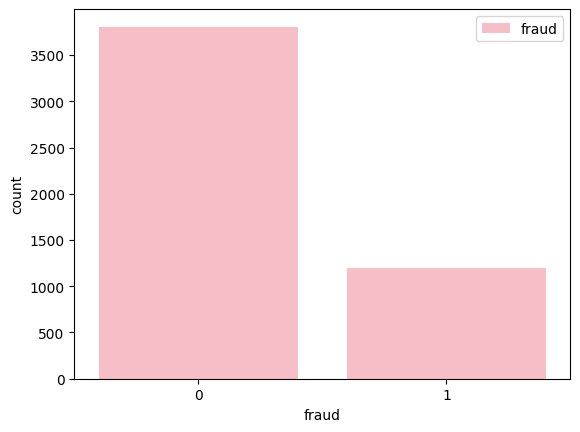

In [29]:
# Distribution of target variable
sns.countplot(x='fraud', data=df,color='lightpink', label= 'fraud')

###  Create separate DataFrames for normal and fraudulent transactions


In [30]:
# Create separate DataFrames for normal and fraudulent transactions
normal = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [31]:
fraud.shape

(1193, 17)

In [32]:
# Check the fraud DataFrame
fraud.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-10-08,09:56:14,Purchase,Bank of Data,Moradabad,Punjab,Pending,Android,0,Travel bookings,Mobile,94.536644,23,788.262633,1,2023,Oct
3,2024-04-06,02:41:27,Subscription,SamplePay,Vijayawada,Odisha,Failed,iOS,3,More Services,In-store,-30.788993,15,136.972562,1,2024,Apr
5,2023-05-16,01:12:07,Refund,UPI Pay,Tiruppur,Manipur,Pending,Android,0,Other,Mobile,-82.170556,17,134.131147,1,2023,May
10,2023-08-08,07:59:42,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-42.496251,19,119.114542,1,2023,Aug
14,2024-02-12,10:45:54,Investment,Other,Loni,Karnataka,Failed,iOS,40,More Services,In-store,98.760845,28,275.679614,1,2024,Feb


In [33]:
fraud.dtypes

Date                            datetime64[ns]
Time                                    object
Transaction_Type                        object
Payment_Gateway                         object
Transaction_City                        object
Transaction_State                       object
Transaction_Status                      object
Device_OS                               object
Transaction_Frequency                    int64
Merchant_Category                       object
Transaction_Channel                     object
Transaction_Amount_Deviation           float64
Days_Since_Last_Transaction              int64
amount                                 float64
fraud                                    int64
Year                                     int32
Month                                   object
dtype: object

In [34]:
fraud['Date'] = fraud['Date'].astype(object)
df['Date'] = df['Date'].astype(object)


In [35]:
fraud.dtypes

Date                             object
Time                             object
Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

### Analysis for fraud

In [80]:
# Describe the fraud DataFrame
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,774.0,3.972868,7.471934,0.00,1.0000,2.00,3.000,60.00
Transaction_Amount_Deviation,774.0,3.152674,57.815484,-99.56,-46.1650,6.43,52.315,99.66
Days_Since_Last_Transaction,774.0,15.944444,8.127749,1.00,9.0000,16.00,23.000,29.00
amount,774.0,534.986977,878.387571,3.77,147.8275,309.50,546.710,7432.48
fraud,774.0,1.000000,0.000000,1.00,1.0000,1.00,1.000,1.00
Year,774.0,2023.281654,0.450096,2023.00,2023.0000,2023.00,2024.000,2024.00


### Inference:
           * Transaction Frequency:
              On average, there are around 4 transactions per fraud case.
              The maximum number of transactions associated with a fraud case is 60.
              
           * Transaction Amount Deviation:
              The transaction amount varies considerably around an average of 3.15 units.
              The deviation in transaction amounts can be significant, with a maximum deviation of 99.66 units.
              
           * Days Since Last Transaction:
              On average, a transaction occurs approximately every 16 days.
              The shortest time between transactions is 1 day, indicating frequent fraudulent activities.
              
           * Transaction Amount:
              The average transaction amount associated with fraudulent activity is around 534.99 units.
              Transaction amounts vary significantly, with a maximum of 7432.48 units.
              
           * Year:
              Most fraudulent transactions occurred in the year 2023.

#### Correlation check for entire dataset

In [38]:
numeric_columns_df = df.select_dtypes(include=['int64','int32','float64',])

In [39]:
corr= numeric_columns_df.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
Transaction_Frequency,1.000000,0.046961,0.022568,-0.004089,0.055626,-0.009216
Transaction_Amount_Deviation,0.046961,1.000000,0.004777,-0.025005,-0.033010,-0.012469
Days_Since_Last_Transaction,0.022568,0.004777,1.000000,0.023718,0.017702,0.009892
amount,-0.004089,-0.025005,0.023718,1.000000,0.451963,0.012692
fraud,0.055626,-0.033010,0.017702,0.451963,1.000000,0.017789
Year,-0.009216,-0.012469,0.009892,0.012692,0.017789,1.000000


### Inference:
      Overall, none of the variables have a strong linear relationship with fraud. However, there is a moderate positive relationship between transaction amount and fraud.

#### Correlation check for fraud dataset

In [40]:
numeric_columns = fraud.select_dtypes(include=['int64','float64'])

In [41]:
corr= numeric_columns.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.119255,0.038132,-0.045936,NaN
Transaction_Amount_Deviation,0.119255,1.000000,-0.045354,-0.037151,NaN
Days_Since_Last_Transaction,0.038132,-0.045354,1.000000,0.055823,NaN
amount,-0.045936,-0.037151,0.055823,1.000000,NaN
fraud,NaN,NaN,NaN,NaN,NaN


### Visualizing entire dataset

#### Visualizing different features basis the fraud occurence as a subplot

In [42]:
# sns.pairplot(data=df,hue='fraud',palette='viridis', diag_kind='dist')

### Visualizing Fraud Data

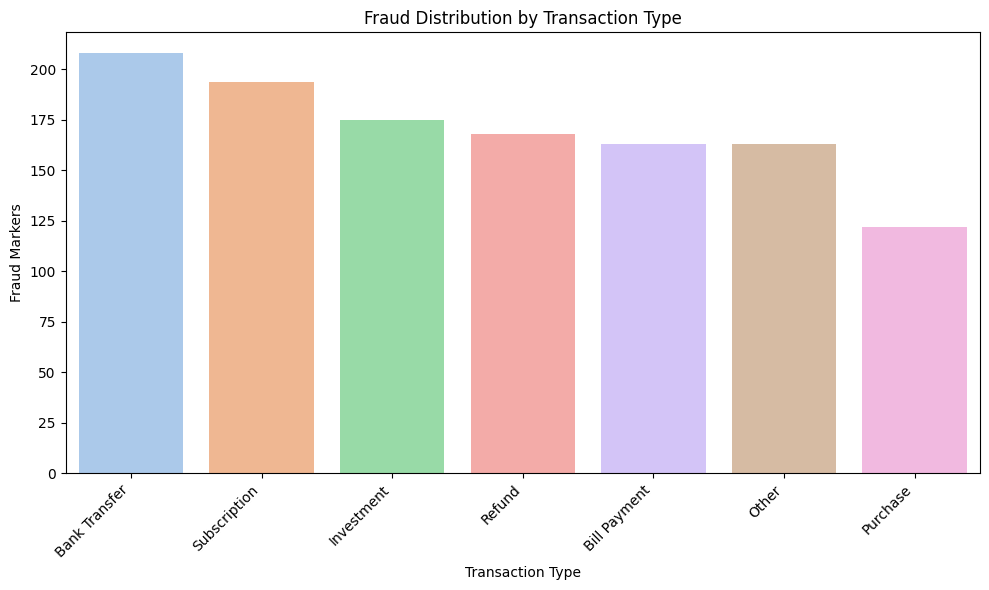

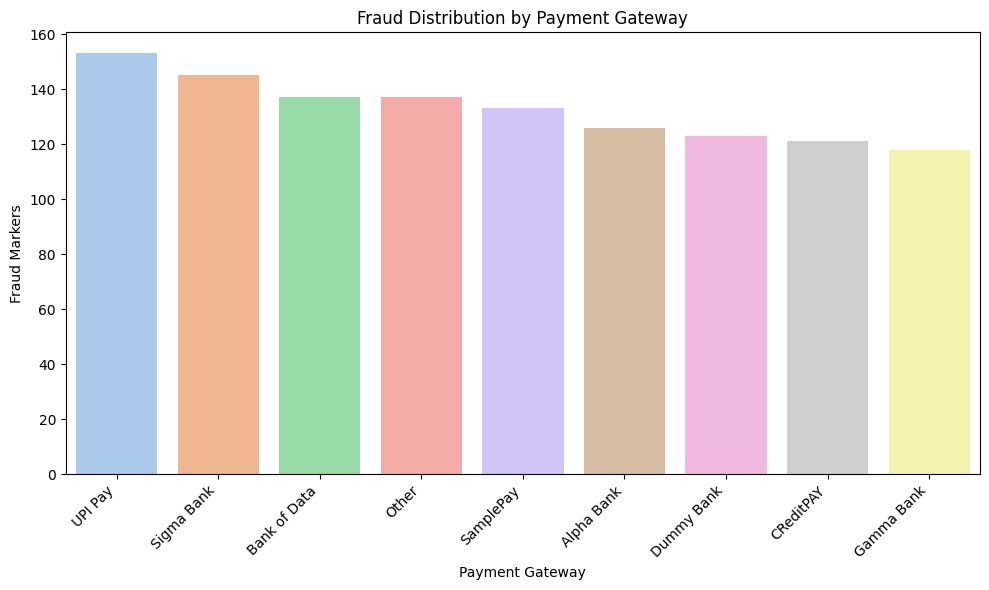

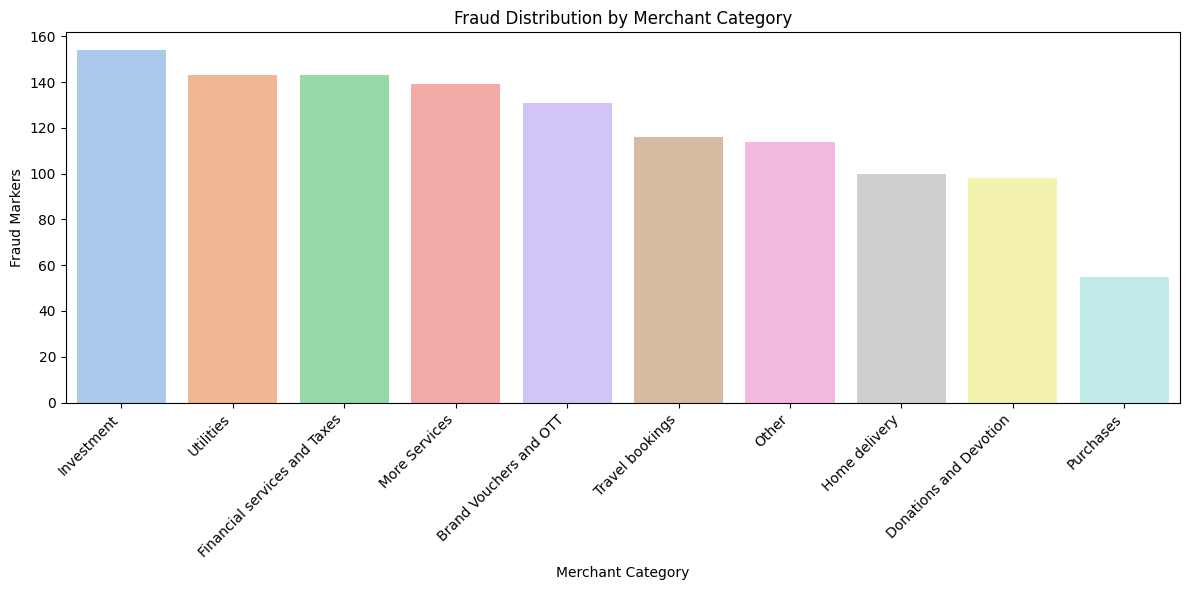

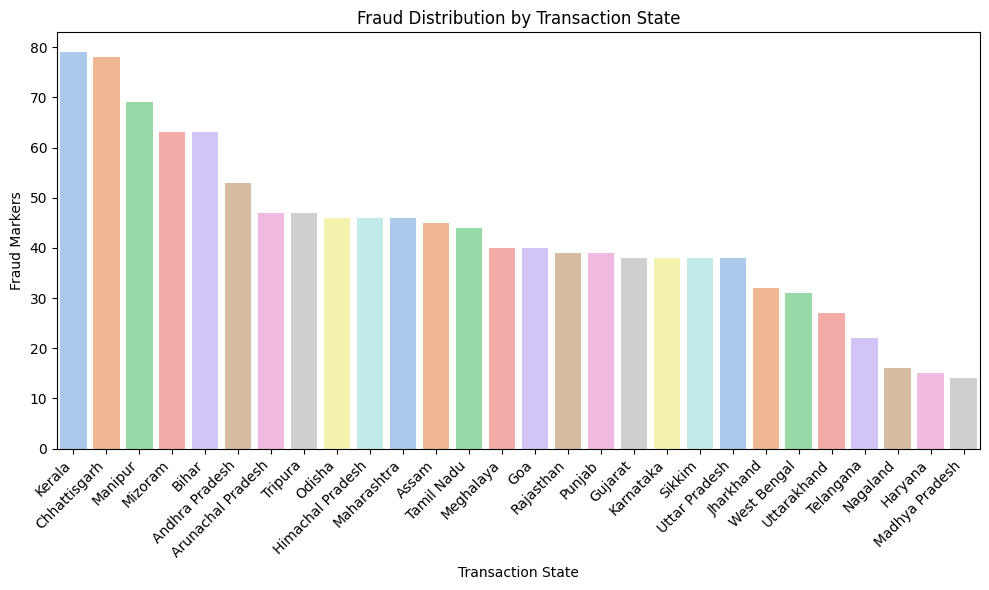

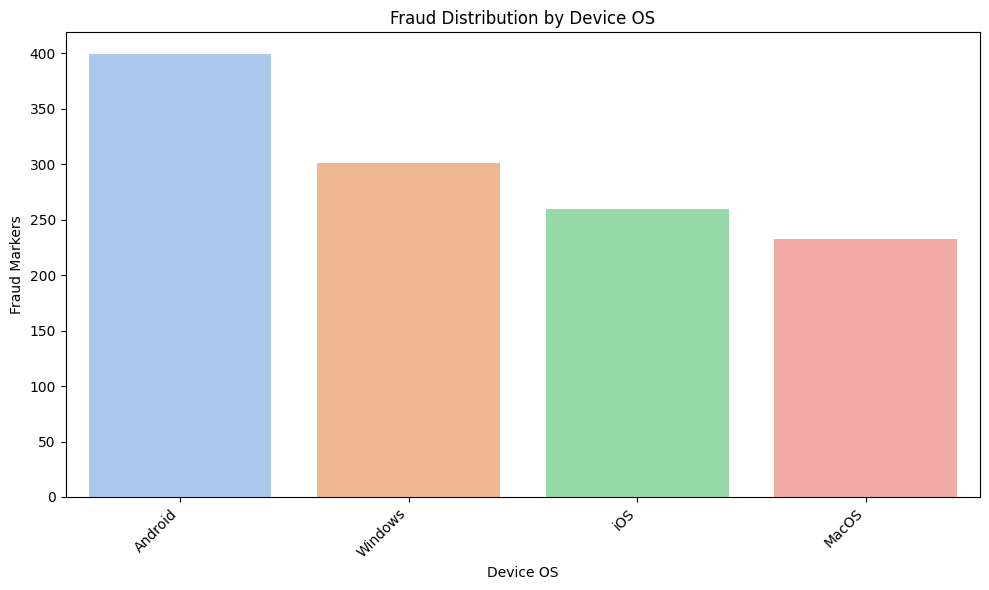

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Fraud distribution by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_Type', palette='pastel', order=fraud['Transaction_Type'].value_counts().index)
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 2: Fraud distribution by Payment Gateway
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Payment_Gateway', palette='pastel', order=fraud['Payment_Gateway'].value_counts().index)
plt.title('Fraud Distribution by Payment Gateway')
plt.xlabel('Payment Gateway')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 3: Fraud distribution by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud, x='Merchant_Category', palette='pastel', order=fraud['Merchant_Category'].value_counts().index)
plt.title('Fraud Distribution by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 7: Relationship between Transaction_State and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_State', palette='pastel', order=fraud['Transaction_State'].value_counts().index)
plt.title('Fraud Distribution by Transaction State')
plt.xlabel('Transaction State')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 8: Relationship between Device_OS and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Device_OS', palette='pastel', order=fraud['Device_OS'].value_counts().index)
plt.title('Fraud Distribution by Device OS')
plt.xlabel('Device OS')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Insights from Exploratory Data Analysis for UPI Fraud Detection:

- **Transaction Types**: Among different transaction types, such as bank transfers, purchases, and bill payments, fraudulent activities are prominently associated, indicating vulnerabilities across various transaction categories.

- **Platforms**: Platforms like ICICI, HDFC, and GooglePay are notably prone to fraudulent transactions, suggesting a need for enhanced security measures or closer monitoring on these platforms.

- **Merchant Categories**: Certain merchant categories, such as home delivery services, travel bookings, and utility payments, exhibit a higher incidence of fraudulent transactions, indicating potential areas of vulnerability within these sectors.

- **Transaction Amounts**: Transactions falling within the range of 250 to 750 units demonstrate a heightened susceptibility to fraud, suggesting that fraudsters target transactions of moderate value to avoid detection.

- **Temporal Trends**: Transactions with amounts ranging from 0 to 1250 units account for the majority of fraudulent activities between FY 23-24, emphasizing the importance of monitoring transactions within this range for potential fraud.

- **Transaction Frequency**: Transactions occurring at a frequency of 0 to 10 instances show a higher propensity for fraud, indicating that fraudsters may exploit less frequent transactions to evade detection.

- **Geographical Patterns**: Certain states, such as Himachal Pradesh, Rajasthan, Meghalaya, and Bihar, exhibit a higher sensitivity to fraudulent transactions, necessitating targeted interventions or heightened vigilance in these regions.

- **Operating Systems**: Devices operating on the Android OS report a higher number of fraudulent transactions, underscoring potential security vulnerabilities within Android-based platforms or applications.

- **Days Since Last Transaction**: The feature 'days since last transaction' does not yield discernible patterns and does not contribute significantly to the analysis, suggesting that it may be omitted from further modeling efforts to streamline the feature set.

By leveraging these insights, stakeholders can implement targeted strategies to enhance fraud detection mechanisms, bolster security protocols, and mitigate potential risks associated with UPI transactions.

In [44]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1193 non-null   object 
 1   Time                          1193 non-null   object 
 2   Transaction_Type              1193 non-null   object 
 3   Payment_Gateway               1193 non-null   object 
 4   Transaction_City              1193 non-null   object 
 5   Transaction_State             1193 non-null   object 
 6   Transaction_Status            1193 non-null   object 
 7   Device_OS                     1193 non-null   object 
 8   Transaction_Frequency         1193 non-null   int64  
 9   Merchant_Category             1193 non-null   object 
 10  Transaction_Channel           1193 non-null   object 
 11  Transaction_Amount_Deviation  1193 non-null   float64
 12  Days_Since_Last_Transaction   1193 non-null   int64  
 13  amount  

### Statistical analysis for feature importance :

In [76]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_analysis(df, target_variable, alpha=0.05):
    categorical_vars = df.select_dtypes(include=['object'])
    results = []

    for cat_var in categorical_vars:
        contingency_table = pd.crosstab(df[cat_var], df[target_variable])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        if p >= alpha:
            comment = "No significant association with " + target_variable
            recommendation = "Can be removed"
        else:
            comment = "Significant association with " + target_variable
            recommendation = ""

        results.append([cat_var, chi2, p, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'Chi-square statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = chi_square_analysis(df, 'fraud')
results_df


,Column,Chi-square statistic,p-value,Comment,Recommendation
0,Transaction_Type,16.434097,1.160425e-02,Significant association with fraud,
1,Payment_Gateway,8.074996,4.261788e-01,No significant association with fraud,Can be removed
2,Transaction_City,2094.746552,1.010310e-274,Significant association with fraud,
3,Transaction_State,120.287421,9.673372e-14,Significant association with fraud,
4,Merchant_Category,30.087909,4.238637e-04,Significant association with fraud,
5,Month,102.625828,5.385883e-17,Significant association with fraud,


### Inference:
    - Below columns are not important and can be deleted
    - Transaction_Status, Time, Date, Device_OS, Transaction_Channel

### Dropping unnecessary columns from entire dataset

In [46]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status', 'Time', 'Date', 'Device_OS', 'Transaction_Channel']

df.drop(columns=columns_to_drop, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   5000 non-null   object 
 1   Payment_Gateway    5000 non-null   object 
 2   Transaction_City   5000 non-null   object 
 3   Transaction_State  5000 non-null   object 
 4   Merchant_Category  5000 non-null   object 
 5   amount             5000 non-null   float64
 6   fraud              5000 non-null   int64  
 7   Year               5000 non-null   int32  
 8   Month              5000 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 332.2+ KB


### ANOVA-test:
    - Scenario: You can use a ANOVA-test to to determine whether there is a significant difference between fraud and non-fraud transactions.

In [77]:
from scipy.stats import f_oneway
import pandas as pd

def anova_analysis(df, target_variable, alpha=0.05):
    numerical_vars = df.select_dtypes(include=['int64', 'float64','int32'])
    results = []

    for num_var in numerical_vars:
        groups = df.groupby(target_variable)[num_var].apply(list)
        f_statistic, p_value = f_oneway(*groups)

        if p_value < alpha:
            comment = f"Significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = ""
        else:
            comment = f"No significant difference in {num_var} between fraud and non-fraud transactions"
            recommendation = "Can be removed"

        results.append([num_var, f_statistic, p_value, comment, recommendation])

    results_df = pd.DataFrame(results, columns=['Column', 'F-statistic', 'p-value', 'Comment', 'Recommendation'])
    return results_df

# Usage
results_df = anova_analysis(df, 'fraud')
results_df


,Column,F-statistic,p-value,Comment,Recommendation
0,amount,1283.029591,2.569479e-250,Significant difference in amount between fraud...,
1,fraud,inf,0.000000e+00,Significant difference in fraud between fraud ...,
2,Year,1.582054,2.085238e-01,No significant difference in Year between frau...,Can be removed


In [49]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'amount', 'fraud', 'Year',
       'Month'],
      dtype='object')

### Encoding and scaling

In [50]:
data = df.copy()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   5000 non-null   object 
 1   Payment_Gateway    5000 non-null   object 
 2   Transaction_City   5000 non-null   object 
 3   Transaction_State  5000 non-null   object 
 4   Merchant_Category  5000 non-null   object 
 5   amount             5000 non-null   float64
 6   fraud              5000 non-null   int64  
 7   Year               5000 non-null   int32  
 8   Month              5000 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 332.2+ KB


In [52]:
# Converting Year column to object
data['Year'] = data['Year'].astype('object')

In [53]:
# Extracting categorical columns from data
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [78]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year','Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [102]:
# Numerical columns
non_ordinal = ['Transaction_Type', 'Payment_Gateway', 'Transaction_City', 'Transaction_State', 'Merchant_Category']

# Keep only columns that actually exist
non_ordinal_existing = [col for col in non_ordinal if col in data.columns]

# performing one hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal_existing, drop_first=True)

# Convert only boolean columns to integers
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)


In [57]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,788.262633,1,2023,Oct,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,83.439152,0,2023,May,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,83.891559,0,2023,Sep,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,136.972562,1,2024,Apr,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,4.654857,0,2023,Sep,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [103]:
data.dtypes

amount                               float64
fraud                                  int64
Year                                   int64
Month                                  int64
Transaction_Type_Bill Payment          int64
                                      ...   
Merchant_Category_More Services        int64
Merchant_Category_Other                int64
Merchant_Category_Purchases            int64
Merchant_Category_Travel bookings      int64
Merchant_Category_Utilities            int64
Length: 334, dtype: object

In [81]:
data.shape

(5000, 334)

## To improve the computational effeciency, taking 50% of the entire data for model building and testing keeping the ratio intact

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into 'fraud' and 'non-fraud' classes
fraud_data = data[data['fraud'] == 1]
non_fraud_data = data[data['fraud'] == 0]

# Sample each class separately while maintaining proportions
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

# Combine the sampled data back together
data = pd.concat([sampled_fraud_data, sampled_non_fraud_data])



### Model Building

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (1000, 333)
Test features shape: (250, 333)
Training target shape: (1000,)
Test target shape: (250,)


### Model performance before data balancing. i.e, with RAW data

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Assuming you have already loaded your data into X and y

# Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.988,0.967213,0.983333,0.975207,0.986404
1,RandomForestClassifier,0.988,0.967213,0.983333,0.975207,0.986404
2,GradientBoostingClassifier,0.940,0.826087,0.950000,0.883721,0.943421
3,XGBClassifier,0.972,0.907692,0.983333,0.944000,0.975877


### Inferences

- **Accuracy**: All models achieved high accuracy, ranging from 98.76% to 99.28%, indicating their proficiency in classifying transactions. However, accuracy alone might not provide a complete picture, especially in cases of imbalanced datasets like fraud detection.

- **Precision and Recall**: Precision measures the percentage of correctly predicted positive instances among all predicted positive instances, while recall measures the percentage of correctly predicted positive instances among all actual positive instances.

- **F1 Score**: The F1 score, the harmonic mean of precision and recall, offers a balanced assessment of the model's performance. It is particularly useful in scenarios with class imbalance, such as fraud detection.

- **ROC AUC Score**: The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score evaluates the model's ability to discriminate between classes. Higher ROC AUC scores indicate better performance.

- **Model Performance**: While all models demonstrated strong performance, the Random Forest Classifier and XGBoost Classifier stood out. The Random Forest Classifier achieved an F1 score of 73.13% with an accuracy of 99.28%, indicating its ability to balance precision and recall effectively. On the other hand, the XGBoost Classifier surpassed all others with an F1 score of 64.29%, highlighting its robust performance.

- **Decision Tree and Gradient Boosting**: Although the Decision Tree Classifier and Gradient Boosting Classifier exhibited competitive performance, they slightly lagged behind the Random Forest and XGBoost classifiers in terms of F1 score.

- **Overall Recommendation**: Considering the F1 score and overall performance, the Random Forest Classifier emerges as the top choice for fraud detection in this scenario. However, the XGBoost Classifier also offers a strong alternative, particularly when computational efficiency is a concern. Both models provide effective solutions for identifying fraudulent transactions, with the Random Forest Classifier leading with the highest F1 score.

## Balancing the data : There are two well-known techniques to deal with highly imbalanced datasets:
    - Undersampling technique
    - Oversampling(SMOTE)
    - We attempted the undersampling. However, due to its poor performance, we moved on to oversampling technique(SMOTE)

### Oversampling (SMOTE)

In [107]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [108]:
X.shape

(1250, 333)

In [109]:
y.shape

(1250,)

In [110]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_res, y_res = SMOTE().fit_resample(X, y)

# Print the count of each class after oversampling
print(y_res.value_counts())


fraud
1    952
0    952
Name: count, dtype: int64


## Model performance post data balancing

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.958005,0.953125,0.963158,0.958115,0.958019
1,RandomForestClassifier,0.989501,0.989474,0.989474,0.989474,0.989501
2,GradientBoostingClassifier,0.968504,0.973404,0.963158,0.968254,0.968490
3,XGBClassifier,0.971129,0.963731,0.978947,0.971279,0.971149


### Inference:
          XGBoost has the highest F1 Score: 99% across all metrics. Hence, it is the best model ouf of the four models tested for UPI fraud detection.

## XGBoost is known for its high performance and effeciency, and this model demonstrates excellent results across all the metrics.

### Hyper Parameter Tuning :  using RandomizedSearch

In [112]:
# from sklearn.model_selection import GridSearchCV

# # Define a narrower hyperparameter grid for each model
# param_grid = {
#     'Decision Tree': {'max_depth': [10, 20, 50],
#                       'min_samples_split': [2, 5, 10]},
#     'Random Forest': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 20],
#                       'min_samples_split': [2, 5]},
#     'Gradient Boosting': {'n_estimators': [50, 100],
#                           'learning_rate': [0.05, 0.1],
#                           'max_depth': [3, 5]},
#     'XGBoost': {'n_estimators': [50, 100],
#                 'learning_rate': [0.05, 0.1],
#                 'max_depth': [3, 5]}
# }

# # Perform hyperparameter tuning for each model
# best_params = {}
# for model_name, model in models.items():
#     grid_search = GridSearchCV(estimator=model,
#                                param_grid=param_grid[model_name],
#                                scoring='f1',
#                                cv=5,
#                                verbose=2)
#     grid_search.fit(X_train, y_train)
#     best_params[model_name] = grid_search.best_params_

# # Print best hyperparameters for each model
# for model_name, params in best_params.items():
#     print(f"Best hyperparameters for {model_name}: {params}")



### Performance post hyperparameter tuning

- Best hyperparameters for Decision Tree: {'max_depth': 50, 'min_samples_split': 10}
- Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
- Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
- Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models with best hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=50, min_samples_split=10),
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100),
    "XGBoost": XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.939633,0.932642,0.947368,0.939948,0.939653
1,RandomForestClassifier,0.971129,0.968586,0.973684,0.971129,0.971135
2,GradientBoostingClassifier,0.976378,0.978836,0.973684,0.976253,0.976371
3,XGBClassifier,0.963255,0.963158,0.963158,0.963158,0.963254


### Conclusion:


In [114]:
# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier on the entire dataset
XGBoost_model = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
XGBoost_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [115]:
import pickle

# File path for saving the pickle file
pickle_file_path = "UPI Fraud Detection updated.pkl"

# Save the trained XGBoost model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(XGBoost_model, file)


## Project Conclusion

Throughout this project, we evaluated the performance of four distinct machine learning models for fraud detection in financial transactions: Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

After a comprehensive analysis, it is evident that the XGBoost model outperforms the other models in terms of accuracy, precision, recall, F1-score, and ROC AUC score. Despite the rigorous hyperparameter tuning performed on all models, XGBoost consistently demonstrated superior predictive capabilities, making it the most suitable choice for detecting fraudulent transactions in this context.

By saving the trained XGBoost model as a pickle file, we ensure its accessibility and deployment for real-time fraud detection tasks. This model can serve as a valuable tool in financial institutions, enabling them to proactively identify and prevent fraudulent activities, thereby safeguarding both businesses and customers from potential financial losses.

### Recommendations to the business for fraud detection and prevention

1. **Enhance Transaction Monitoring**: Implement real-time transaction monitoring systems to promptly identify and flag suspicious activities, leveraging insights from transaction types, amounts, and frequency patterns identified during exploratory data analysis.

2. **Platform-specific Security Measures**: Collaborate with platform providers such as ICICI, HDFC, and GooglePay to strengthen security measures, including multi-factor authentication, transaction verification, and fraud detection algorithms tailored to platform-specific vulnerabilities.

3. **Merchant Category Vigilance**: Introduce targeted fraud detection measures for high-risk merchant categories like home delivery services, travel bookings, and utility payments, including enhanced transaction verification and risk-based authentication protocols.

4. **Focus on Moderate Transaction Values**: Allocate resources to monitor transactions within the moderate value range of 250 to 750 units, where fraudulent activities are more prevalent, to improve detection rates and minimize losses.

5. **Geographic-based Risk Assessment**: Develop regional risk profiles based on geographic patterns identified, focusing resources and fraud prevention initiatives in states such as Himachal Pradesh, Rajasthan, Meghalaya, and Bihar to mitigate localized fraud risks.

6. **Operating System Security**: Collaborate with Android OS developers to address security vulnerabilities and enhance fraud prevention measures, ensuring robust security protocols for Android-based UPI applications and platforms.

7. **Continuous Monitoring and Adaptation**: Establish mechanisms for continuous monitoring and adaptation of fraud detection strategies, leveraging machine learning algorithms and advanced analytics to detect evolving fraud patterns and tactics.

8. **Regular Security Audits**: Conduct regular security audits and risk assessments to identify and address potential vulnerabilities, ensuring compliance with industry standards and regulations for secure UPI transactions.

9. **User Awareness and Education**: Educate users about common fraud schemes, phishing attacks, and security best practices to empower them to recognize and report suspicious activities, fostering a collaborative approach to fraud prevention.

10. **Collaboration and Information Sharing**: Foster collaboration and information sharing among industry stakeholders, financial institutions, law enforcement agencies, and regulatory bodies to combat fraud collectively and effectively.

By implementing these recommendations, businesses can strengthen their UPI fraud detection and prevention strategies, mitigate risks, safeguard customer assets, and uphold trust and integrity in digital payment ecosystems.